# Logistic Regression

Logistic regression is a regression technique that is used to classification problem.
In other words, when we want to split into distinct classes. As regression models, it is 
possible use a number of distinct feature. Therefore, the goal is to create a model which 
fits some data distribution. 

In [29]:
from __future__ import division
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_classification, make_regression
from sklearn.metrics import classification_report, accuracy_score
from sklearn import linear_model
import scipy.optimize as opt

## Distinction with linear regression

Let's suppose the following distribution:

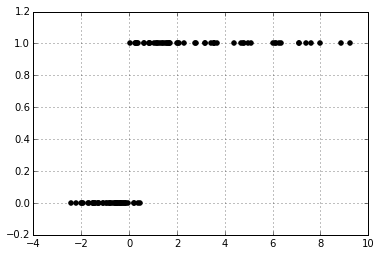

In [30]:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# plot
plt.grid()
plt.scatter(X.ravel(), y, color='black', zorder=20)
plt.show()

Whether we want to fit it by a linear regression model

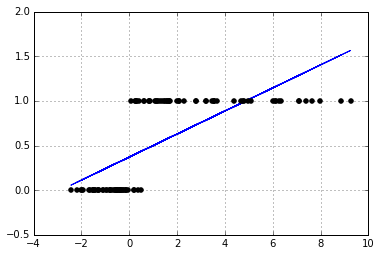

In [31]:
lr = linear_model.LinearRegression()
lr.fit(X, y)

# plot
plt.grid()
plt.scatter(X.ravel(), y, color='black', zorder=20)
plt.plot(X, lr.coef_ * X + lr.intercept_, linewidth=1)
plt.show()

It is not able to fit the model the way we expect. Instead of applying a simple
linear regression we should use some technique more appropriate to this problem.

In this example, a sigmoid function should work better. The goal of applying a 
sigmoid function as our objective function is that is easy to set a threshold and
split our data in two distinct classes

Therefore a sigmoid function can lead to a better estimate of our data. 
Then our hypothesis function is a sigmoid, in the following way:

$h_{\theta}(x) = g(\theta^{T}x)$

$g(z) = \frac{1}{1 + e^{-z}}$

In [32]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

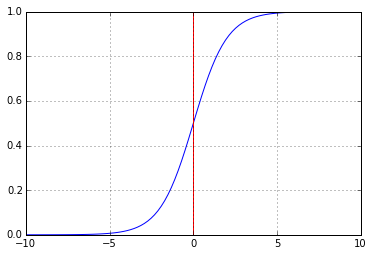

In [33]:
x = np.linspace(-10, 10, 100)
y = np.array(x < 0.5, dtype=np.uint8)

plt.grid()
plt.plot(x, sigmoid(x))
plt.plot([0, 0], [0, 1], 'r-')
plt.show()

The cost function of a logistic regression is given by:

/Users/danilonunes/.virtualenvs/dns/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()


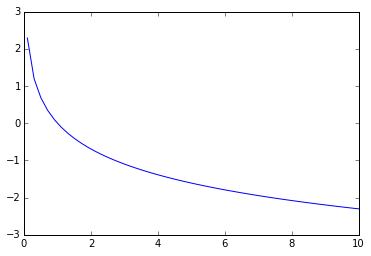

In [34]:
# for y = 1
l = np.linspace(-10, 10, 100)
plt.plot(l, -np.log(l))
plt.show()

/Users/danilonunes/.virtualenvs/dns/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


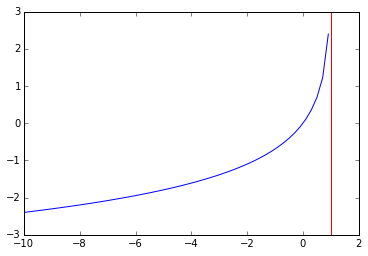

In [35]:
# for y = 0
plt.plot(l, - np.log(1 - l))
plt.plot([1, 1], [-3, 3], 'r-')
plt.show()

The above plots can be viewed as 

### for y = 1

When x tends to 0 y goes to infinity. In the opposite way

### for y = 0

When x closes to 1 y goes to infinity.

The interpretation is, for instance considering y=0, if we known that our sample belongs to class 0 it is 
impossible it is class 1


Putting all toghether we have the following equation

$J(\theta) = \frac{1}{m} \sum_{i=1}^{m}[-y_{i} \log(h_{\theta}(x_{i})) - (1-y_{i})\log(1 - h_{\theta}(x_{i}))]$

then:

In [61]:
def cost(theta, X, y):
    m = len(X)
    h = sigmoid(np.dot(X, theta)) 
    loss = ((-y * np.log(h) - (1 - y) * np.log(1 - h)) * X.T).sum()
    return loss / m

Following the same procedure we update gradient in a similar way:

$\frac{\partial J(\theta)}{\partial \theta_{j}} = \frac{1}{m} \sum_{i=1}^{m}(h_{\theta}(x_{i}) -y_{i})x_{i}$

In [9]:
def grad(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    grad = np.dot(h - y, X) / y.size
    return grad

Then using scipy to optimize gradient we have a logistic regression model

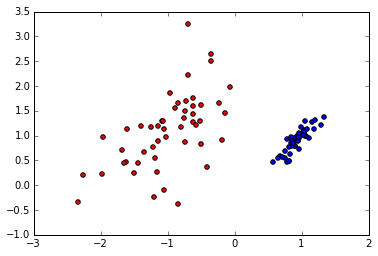

In [38]:
# randomly generate a regression sample dataset
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1) 

class0 = np.where(y==0)[0]
class1 = np.where(y==1)[0]

plt.scatter(X[class0, 0], X[class0, 1], c='r')
plt.scatter(X[class1, 0], X[class1, 1], c='b')
plt.show()

In [39]:
theta = np.random.randn(X.shape[1] + 1)
X_ =  np.append(np.ones((X.shape[0], 1)), X, axis=1)

# Minimize a function using the BFGS algorithm
# cost   = objective function
# theta  = initial guess
# fprime = gradiente function
opt_theta = opt.fmin_bfgs(cost, theta, fprime=grad, args=(X_, y))

print opt_theta

Optimization terminated successfully.
         Current function value: 0.000021
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 18
[ -0.14193467  17.79766776  -4.03667894]


The goal is then for a new data be able to predict the class. So that,
we just apply our sigmoid function with the computed $h_{\theta}$.

In [40]:
def predict(theta, X):
    h = sigmoid(np.dot(X, theta))
    return h > 0.5

In [42]:
y_true = y
y_pred = predict(opt_theta, X_)

print 'Accuracy: {:.2f}%'.format(100 * accuracy_score(y_true, y_pred))
print classification_report(y_true, y_pred)

Accuracy: 100.00%
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       100



In [43]:
def predict_proba(theta, x):
    return sigmoid(theta[0] + x.dot(theta[1:].T))
#     return sigmoid(np.dot(X, theta))

In [47]:
print predict_proba(opt_theta, X)[0], y[0]

0.999996911596 1


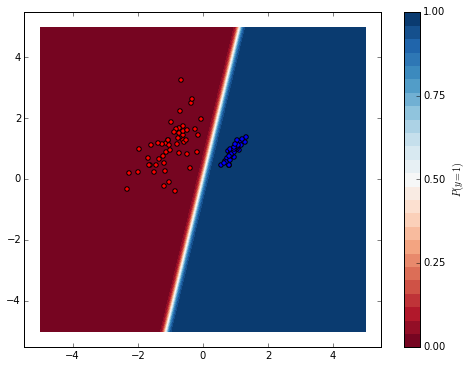

In [48]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = predict_proba(opt_theta, grid).reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[class0, 0], X[class0, 1], c='r')
ax.scatter(X[class1, 0], X[class1, 1], c='b')
plt.show()

In [16]:
def map_feature(x1, x2):
    """
    Extracted from https://gist.github.com/marcelcaraciolo/1365704
    Maps the two input features to quadratic features.
    Returns a new feature array with more features, comprising of
    X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, etc...
    Inputs X1, X2 must be the same size
    """
    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    degree = 6
    out = np.ones(shape=(x1[:, 0].size, 1))

    m, n = out.shape
    
    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            out = np.append(out, r, axis=1)

    return out

In [17]:
# theta = np.random.randn(X.shape[1] + 1)
X_ext = map_feature(X[:, 0], X[:, 1])
X_ext = np.append(np.ones((X_ext.shape[0], 1)), X_ext, axis=1)
theta_ext = np.random.randn(X_ext.shape[1])

# Minimize a function using the BFGS algorithm
# cost   = objective function
# theta  = initial guess
# fprime = gradiente function
opt_theta_ext = opt.fmin_bfgs(cost, theta_ext, fprime=grad, args=(X_ext, y))

print opt_theta_ext

         Current function value: nan
         Iterations: 2
         Function evaluations: 14
         Gradient evaluations: 14
[ 1.05924397  1.04411176 -0.93149214  0.3798976  -0.30281789  0.92171662
  0.26725641  1.58966819  0.79825544  1.47115613 -0.12822682 -0.52657911
  0.2221423   0.46255163  1.12811157  2.55427332  0.80040346 -0.39399739
  0.35614873  0.04112346  1.33839561 -1.31599964  0.28278982  0.82652889
  0.80717718  0.18211453  0.29470134 -0.40843442 -0.3949505 ]


/Users/danilonunes/.virtualenvs/dns/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
/Users/danilonunes/.virtualenvs/dns/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in multiply
/Users/danilonunes/.virtualenvs/dns/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


/Users/danilonunes/.virtualenvs/dns/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


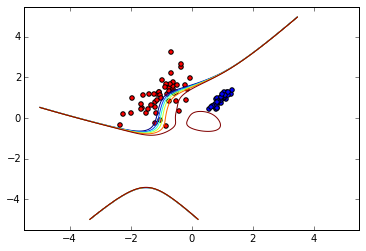

In [18]:
#Plot Countour
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

probs_ = []
for (gx, gy) in grid:
    in_ = map_feature(np.array(gx), np.array(gy))
    probs_.append(predict_proba(opt_theta_ext, in_))
    
    
plt.scatter(X[class0, 0], X[class0, 1], c='r')
plt.scatter(X[class1, 0], X[class1, 1], c='b')
plt.contour(xx, yy, np.array(probs_).reshape(xx.shape))
plt.show()

In [59]:
def regu_cost(theta, X, y):
    m = len(X)
    h = sigmoid(np.dot(X, theta)) 
    loss = ((-y * np.log(h) - (1 - y) * np.log(1 - h + 1e-15)) + ((0.1/m) * theta[1:])).sum()
    return loss / m

In [60]:
# theta = np.random.randn(X.shape[1] + 1)
X_ext = map_feature(X[:, 0], X[:, 1])
X_ext = np.append(np.ones((X_ext.shape[0], 1)), X_ext, axis=1)
theta_ext = np.random.randn(X_ext.shape[1])

# Minimize a function using the BFGS algorithm
# cost   = objective function
# theta  = initial guess
# fprime = gradiente function
opt_theta_ext = opt.fmin_bfgs(regu_cost, theta_ext, fprime=grad, args=(X_ext, y))

print opt_theta_ext

ValueError: operands could not be broadcast together with shapes (100,) (28,) 